In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from scipy.special import lambertw
import matplotlib.ticker as ticker
import re


def π(s):
    # Computes the fixation probability  
    out = 1.0-np.exp(-2*s)
    out[out<0] = 0
    return out

def WM_model(fs, fd):
    # Computes the WM result  
    fs = fs - 1   
    fd = fd - 1
    fs = fs[fs > 0]
    fd = fd[fd > 0]
    
    Ps = mus*π(fs)
    Pd = mud*π(fd)
    Z = Pd.sum() + Ps.sum()
    return Pd.sum()/Z

def CI_model(fs,fd,MS):
    # Computes the CI result  
    out = []
    fs = fs - 1   
    fd = fd - 1
    
    fs = fs[fs > 0]
    fd = fd[fd > 0]
    
    ns = len(fs)
    nd = len(fd)
    for ms in MS:
        N = int(ms/Ubs)
        Λs = N*np.log(N)/np.log(1+fs)
        Λd = N*np.log(N)/np.log(1+fd)
        
        for i in range(ns):
            Λs[i] *= (mus*np.sum(π(fs[fs>fs[i]])) + mud*np.sum(π(fd[fd>fs[i]])))
        for i in range(nd):
            Λd[i] *= (mus*np.sum(π(fs[fs>fd[i]])) + mud*np.sum(π(fd[fd>fd[i]])))
            
        Ps = π(fs)*np.exp(-Λs)*mus
        Pd = π(fd)*np.exp(-Λd)*mud
        
        Z = Ps.sum()+Pd.sum()      
        Pd /= Z
        out.append(Pd.sum())

    return out

TEM1 Data

In [5]:
# Load TEM1 data


#α = 0.0041
#folder = '../../../Data_TEM1/data_TEM1_00041'   

α = 0.0037
#folder = '../../../Data_TEM1/data_TEM1_00037'   
folder = '/Users/juklug/Desktop/simu/data_TEM1_00037_largerRange'

ris, ris0, fits = [], [], []
for s in sorted(glob.glob(folder+'/*ris.npy')):
    result = re.search(''+folder+'/(.*)_', s)
    seed = result.group(1)
    ris.append(np.load(folder+"/"+seed+"_ris.npy"))
    ris0.append(np.load(folder+"/"+seed+"_ris0.npy"))
    fits.append(np.load(folder+"/"+seed+"_fit.npy"))
x = np.load(glob.glob(folder+'/*MS.npy')[0])
ris = np.array(ris)
ris0 = np.array(ris0)
fits = np.array(fits)

fs = np.load("../WF_Simulations/singles_TEM1.npy")
fd = np.load("../WF_Simulations/doubles_TEM1.npy")
ns = len(fs)
nd = len(fd)

nsb = len(fs[fs>1])
ndb = len(fd[fd>1])

print("ns", ns)
print("nd", nd)
mus = 2.3*10**(-10)*3*0.76/6.09  
mud = 2.3*10**(-10)*α*3*0.99*0.51/10.23  

U = ns*mus + nd*mud
fractionAAlevel = mud*nd/(mud*nd+mus*ns)
fractionAAlevelBeneficial = mud*ndb/(mud*ndb+mus*nsb)

Ubs = mus*nsb+mud*ndb

ΔW_SD = []
ΔW_S = []

for j in range(ris.shape[1]):
    R = ris[:,j,:]
    ΔW_SD.append((fits * R).sum(axis=1).mean() - 1)
    
    R = ris0[:,j,:]
    ΔW_S.append((fits[:,:ns+1] * R).sum(axis=1).mean() - 1)
    
ΔW_SD_TEM1 = np.array(ΔW_SD)
ΔW_S_TEM1 = np.array(ΔW_S)

#xshift_TEM1=(len(fs[fs>1])*mus+len(fd[fd>1])*mud)/(len(fs)*mus+len(fd)*mud)
xshift_TEM1=1.0

ns 1745
nd 2391


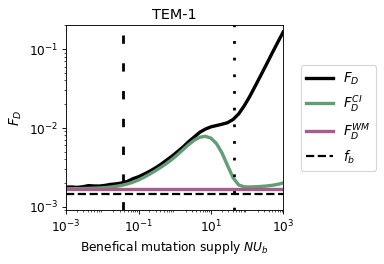

In [6]:
#Plot TEM1 results with alpha=0.00041

plt.figure(figsize=(3.5, 3), dpi=80)

plt.xscale("log")
plt.yscale("log")
plt.ylim(9*10**(-4),2*10**(-1))
plt.xlim(10**(-3.),10**(3))


plt.plot(xshift_TEM1*x,ris[:,:,ns+1:].sum(axis=2).mean(axis=0),color="black",linewidth=3, label="$F_D$")
plt.plot(xshift_TEM1*x,CI_model(fs,fd,x),linewidth = 3, color = "#639C75", label="$F_D^{CI}$")
plt.axhline([WM_model(fs,fd)],color="#9C638A",linewidth=3, label="$F_D^{WM}$")


epsilon=1
plt.axhline([fractionAAlevelBeneficial], linestyle="--", color="black",linewidth=2, label="$f_b$")
plt.axvline([np.real(epsilon/(2*lambertw(epsilon/(2*Ubs))))], linestyle=(0, (3, 7)), color="black",linewidth=2.5)
plt.axvline([np.real(epsilon*ns/(2*lambertw(epsilon/(2*mus))))], linestyle=(0, (1, 5)), color="black",linewidth=2.5)


plt.xlabel("Benefical mutation supply $NU_b$", fontsize = 11)
plt.ylabel(r"$F_{D}$", fontsize = 12)
plt.title("TEM-1", fontsize = 13)


# Move the legend outside of the plot
plt.legend(fontsize=12, bbox_to_anchor=(1.05, 0.5), loc='center left')

# Customize the x and y ticks
x_ticks = [10**(-3), 10**(-1), 10**1, 10**3]
x_labels = ['10$^{-3}$', '10$^{-1}$', '10$^1$', '10$^3$']
plt.xticks(x_ticks, x_labels, fontsize=11)

plt.yticks(fontsize=11)


#plt.savefig("plotTEM1_00041.pdf", bbox_inches = "tight")
plt.savefig("plotTEM1_00037.pdf", transparent=True, bbox_inches = "tight")


P53

In [2]:
# Load P53 data

α = 2*10**(-3)
#folder = '../../../Data_P53/dataP53_0002'   
folder = '/Users/juklug/Desktop/simu/dataP53_0002_largerRange'

ris = []
ris0 = []
fits = []
for s in sorted(glob.glob(folder+'/*ris.npy')):
    result = re.search(''+folder+'/(.*)_', s)
    seed = result.group(1)
    ris.append(np.load(folder+"/"+seed+"_ris.npy"))
    ris0.append(np.load(folder+"/"+seed+"_ris0.npy"))
    fits.append(np.load(folder+"/"+seed+"_fit.npy"))
x = np.load(glob.glob(folder+'/*MS.npy')[0])
ris = np.array(ris)
ris0 = np.array(ris0)
fits = np.array(fits)



fs = np.load("../WF_Simulations/singles_P53.npy")
fd = np.load("../WF_Simulations/doubles_P53.npy")
ns = len(fs)
nd = len(fd)
print("ns", ns)
print("nd", nd)
mus = 2.7*10**(-9)*3*0.76/6.09  
mud = 2.7*10**(-9)*α*3*0.99*0.51/10.23  

U = ns*mus + nd*mud
Ubs = mus*len(fs[fs>1])

nsb = len(fs[fs>1])
nsd = len(fd[fd>1])


fractionAAlevel = mud*nd/(mud*nd+mus*ns)
fractionAAlevelBeneficial = mud*len(fd[fd>1])/(mud*len(fd[fd>1])+mus*len(fs[fs>1]))

ΔW_SD = []
ΔW_S = []

for j in range(ris.shape[1]):
    R = ris[:,j,:]
    ΔW_SD.append((fits * R).sum(axis=1).mean() - 1)
    
    R = ris0[:,j,:]
    ΔW_S.append((fits[:,:ns+1] * R).sum(axis=1).mean() - 1)
    
ΔW_SD_P53 = np.array(ΔW_SD)
ΔW_S_P53 = np.array(ΔW_S)

xshift_P53=(len(fs[fs>1])*mus+len(fd[fd>1])*mud)/(len(fs)*mus+len(fd)*mud)
xshift_P53=1
print(ris.shape)


ns 2437
nd 3419
(100, 40, 5857)


0.001576000000000001
0.0010210362583485007


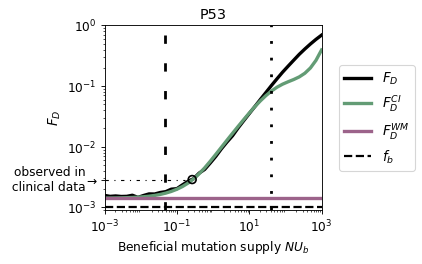

In [5]:
#Plot P53 results with alpha=2*10-3 

plt.figure(figsize=(3.5, 3), dpi=80)

plt.xscale("log")
plt.yscale("log")

plt.plot(xshift_P53 * x, ris[:, :, ns+1:].sum(axis=2).mean(axis=0), color="black", linewidth=3, label="$F_D$")
plt.plot(xshift_P53 * x, CI_model(fs, fd, x), linewidth=3, color="#639C75", label="$F_D^{CI}$")
print(ris[:, :, ns+1:].sum(axis=2).mean(axis=0)[0])

plt.axhline([WM_model(fs, fd)], color="#9C638A", linewidth=3, label="$F_D^{WM}$")

epsilon = 1
plt.axhline(fractionAAlevelBeneficial, linestyle="--", color="black", linewidth=2, label="$f_b$")
print(fractionAAlevelBeneficial)

# Adding an arrow mark as a y-tick to mark the "fixed" value
fixed_value = 0.0028779
y_ticks = list(plt.yticks()[0])
y_ticks.append(fixed_value)

# Format y-tick labels with LaTeX-style notation
y_ticks_labels = [f"$10^{{{int(np.log10(tick))}}}$" if tick != fixed_value else '→' for tick in y_ticks]
plt.yticks(y_ticks, y_ticks_labels)

plt.axvline([np.real(epsilon/(2*lambertw(epsilon/(2*Ubs))))], linestyle=(0, (3, 7)), color="black", linewidth=2.5)
plt.axvline([np.real(epsilon*nsb/(2*lambertw(epsilon/(2*mus))))], linestyle=(0, (1, 5)), color="black", linewidth=2.5)


# Setting the y-limits explicitly to ensure the range remains consistent
plt.ylim(9*10**(-4), 1*10**(0))
plt.xlim(10**(-3.), 10**(3))

# Annotate with "fixed" text to the left of the arrow
plt.annotate("observed in\n clinical data", xy=(plt.xlim()[0], fixed_value), xytext=(plt.xlim()[0]*0.3, fixed_value), 
             textcoords='data', color="black", va='center', ha='right', fontsize=11)

# Assuming you have already set up your plot
x_intersection = 0.265  # Determine the x-value of the intersection
y_intersection = 0.0028779  # This is the fixed value
plt.scatter(x_intersection, y_intersection, edgecolors='black', facecolors='none', s=50, linewidths=1.5, zorder=5)

plt.axhline(y=y_intersection, color='black', linestyle=(0, (3, 5, 1, 5)), xmin=0.0001, xmax=0.37, linewidth=1)


plt.ylabel(r"$F_{D}$", fontsize = 12)
plt.xlabel("Beneficial mutation supply $NU_b$", fontsize=11)
plt.title("P53", fontsize=13)

# Move the legend outside of the plot
plt.legend(fontsize=12, bbox_to_anchor=(1.05, 0.5), loc='center left')

# Customize the x and y ticks
x_ticks = [10**(-3), 10**(-1), 10**1, 10**3]
x_labels = ['10$^{-3}$', '10$^{-1}$', '10$^1$', '10$^3$']
plt.xticks(x_ticks, x_labels, fontsize=11)

plt.yticks(fontsize=11)

plt.savefig("plotP53_0002.pdf", transparent=True, bbox_inches="tight")
plt.show()
